In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('fishdata1.csv')
df

,S.No,Year,Month,Day,Hour,Minute,Second,PM1,PM2.5,PM10,Temp,Humidity,Light,CO,Water Temp,pH
0,1,2019,11,26,10,27,20,8.0,12,14,25,91,34.0,95.0,24.63,6.52
1,2,2019,11,26,10,28,12,9.0,12,15,25,91,34.0,95.0,24.63,6.59
2,3,2019,11,26,10,29,4,10.0,14,15,26,89,34.0,95.0,24.63,6.53
3,4,2019,11,26,10,29,56,8.0,12,12,26,90,34.0,95.0,24.56,6.59
4,5,2019,11,26,10,30,43,9.0,12,15,26,91,34.0,95.0,24.56,6.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23531,23532,2019,12,10,8,8,23,18.0,27,28,45,-13,35.0,95.0,27.06,6.34
23532,23533,2019,12,10,8,9,9,19.0,33,48,47,9,35.0,95.0,27.06,6.35
23533,23534,2019,12,10,8,9,57,22.0,30,34,47,8,35.0,95.0,27.06,6.34
23534,23535,2019,12,10,8,10,49,21.0,35,47,51,6,34.0,95.0,27.06,6.38


In [4]:
df.columns

Index(['S.No', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'PM1',
       'PM2.5', 'PM10', 'Temp', 'Humidity', 'Light', 'CO', 'Water Temp', 'pH'],
      dtype='object')

In [10]:
df['Month'].value_counts()

12    15768
11     7768
Name: Month, dtype: int64

# Pivot Table

In [6]:
# Temperature pivot
temp_table = pd.pivot_table(df,values='Temp',index=['Month'], aggfunc=np.average)
temp_table

,Temp
Month,
11,36.187822
12,43.306380


In [7]:
# Humidity pivot
Humidity_table = pd.pivot_table(df,values='Humidity',index=['Month'], aggfunc=np.average)
Humidity_table

,Humidity
Month,
11,47.742662
12,26.993214


In [9]:
# CO pivot
CO_table = pd.pivot_table(df,values='CO',index=['Month'], aggfunc=np.average)
CO_table

,CO
Month,
11,92.340348
12,92.650853


In [30]:
# pivot table
table = pd.pivot_table(df,values=['Temp','Humidity','CO'],index=['Month'], aggfunc=np.average)
table

,CO,Humidity,Temp
Month,,,
11,92.340348,47.742662,36.187822
12,92.650853,26.993214,43.306380


# Bining

In [13]:
df_bin = df.groupby(['Month', 'Day'])['Humidity'].mean().reset_index()
df_bin.head()

,Month,Day,Humidity
0,11,26,42.362395
1,11,27,43.748676
2,11,28,56.932362
3,11,29,55.748231
4,11,30,37.525791


## Qcut

In [14]:
# create bining qcut
df_bin['qcut'] = pd.qcut(df['Humidity'], q=4)
df_bin.head()

,Month,Day,Humidity,qcut
0,11,26,42.362395,"(81.0, 95.0]"
1,11,27,43.748676,"(81.0, 95.0]"
2,11,28,56.932362,"(81.0, 95.0]"
3,11,29,55.748231,"(81.0, 95.0]"
4,11,30,37.525791,"(81.0, 95.0]"


In [38]:
df_bin['qcut'].value_counts()

(81.0, 95.0]      14
(10.0, 81.0]       1
(3.0, 10.0]        0
(-24.001, 3.0]     0
Name: qcut, dtype: int64

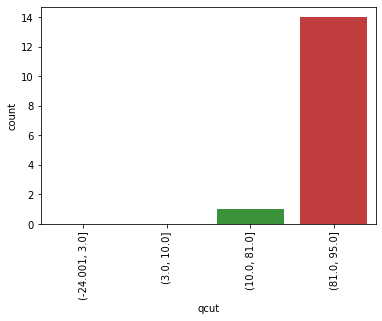

In [21]:
# Plot qcut data as histogram
ax = sns.countplot(data=df_bin, x='qcut')
ax.tick_params(axis='x', labelrotation=90)

## Cut

In [27]:
# create bining cut
# bins = list(range(0, 100, 10))
df_bin['cut'] = pd.cut(df['Humidity'], bins=3, right=False)
df_bin.head()

,Month,Day,Humidity,qcut,cut
0,11,26,42.362395,"(81.0, 95.0]","[55.333, 95.119)"
1,11,27,43.748676,"(81.0, 95.0]","[55.333, 95.119)"
2,11,28,56.932362,"(81.0, 95.0]","[55.333, 95.119)"
3,11,29,55.748231,"(81.0, 95.0]","[55.333, 95.119)"
4,11,30,37.525791,"(81.0, 95.0]","[55.333, 95.119)"


In [28]:
df_bin['cut'].value_counts()

[55.333, 95.119)    14
[15.667, 55.333)     1
[-24.0, 15.667)      0
Name: cut, dtype: int64

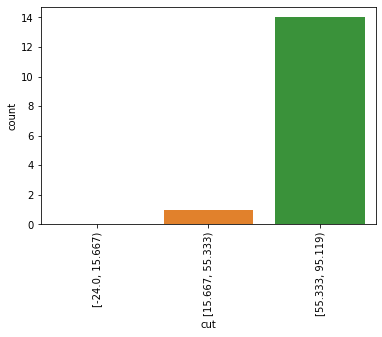

In [29]:
# Plot cut data as histogram
ax = sns.countplot(data=df_bin, x='cut')
ax.tick_params(axis='x', labelrotation=90)

## Name bins

In [46]:
df_bin.describe(include='all')  

,Month,Day,Humidity,qcut,cut,name_bin
count,15.000000,15.000000,15.000000,15,15,1
unique,NaN,NaN,NaN,2,2,1
top,NaN,NaN,NaN,"(81.0, 95.0]","[55.333, 95.119)",Medium
freq,NaN,NaN,NaN,14,14,1
mean,11.666667,13.000000,32.657673,NaN,NaN,NaN
std,0.487950,11.275764,20.465264,NaN,NaN,NaN
min,11.000000,1.000000,1.318919,NaN,NaN,NaN
25%,11.000000,4.500000,14.985698,NaN,NaN,NaN
50%,12.000000,8.000000,39.744819,NaN,NaN,NaN
75%,12.000000,26.500000,45.985416,NaN,NaN,NaN


In [47]:
bin_labels = ['Very low','Low','Medium','High']
df_bin['name_bin'] = pd.qcut(df_bin['Humidity'],q=[0,.25,.50,.75,1],labels=bin_labels)
df_bin.head()

,Month,Day,Humidity,qcut,cut,name_bin
0,11,26,42.362395,"(81.0, 95.0]","[55.333, 95.119)",Medium
1,11,27,43.748676,"(81.0, 95.0]","[55.333, 95.119)",Medium
2,11,28,56.932362,"(81.0, 95.0]","[55.333, 95.119)",High
3,11,29,55.748231,"(81.0, 95.0]","[55.333, 95.119)",High
4,11,30,37.525791,"(81.0, 95.0]","[55.333, 95.119)",Low


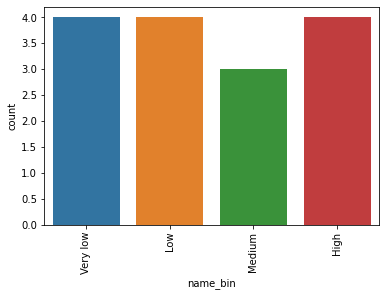

In [50]:
# Plot qcut data as histogram
ax = sns.countplot(data=df_bin, x='name_bin')
ax.tick_params(axis='x', labelrotation=90)

In [4]:
# Import math Library
import math

# Initialize n
n = 6

# Initialize k
k = 2

# Print the number of ways to choose k items from n items
print (math.perm(n, k))

30
